##### _Data Visualization with Python_
---

# Density Plot (Kernel Density Estimate - KDE Plot)

A density plot, often called a Kernel Density Estimate (KDE) plot, is a visualization that shows the *estimated probability density function* of a continuous numerical variable. It's essentially a smoothed version of a histogram. Instead of discrete bins, a density plot uses a *kernel function* to estimate the probability density at each point.

### Suitable Variable Types
* **Numerical (Interval or Ratio):** Density plots are designed for continuous numerical data.

### Use Cases
1. **Visualizing the Distribution:** Like histograms, density plots show the shape of the distribution:
    * **Symmetry/Skewness:** Is the distribution symmetrical, left-skewed, or right-skewed?
    * **Modality:** Is it unimodal, bimodal, or multimodal?
    * **Tails:** Are the tails heavy or light?
2. **Comparing Distributions:** Density plots can be overlaid to compare the distributions of a variable across different groups or categories.  This is often clearer than overlaying histograms, especially if the distributions overlap significantly.
3. **Smoothing Noisy Data:** Density plots can smooth out the noise in a histogram, making it easier to see the underlying shape of the distribution, especially with large datasets.
4. **Identifying Clusters and Gaps:** Smooth curve of the density can give insights about where the data is concentrated.
5. **Checking Normality:** It is also very common to check if the data is normally distributed.

### How it Works (Kernel Density Estimation)
* **Kernel Function:** A kernel function is a weighting function that determines how much influence each data point has on the estimated density at a given point. Common kernel functions include Gaussian (normal), Epanechnikov, and uniform.
* **Bandwidth:** The *bandwidth* is a parameter that controls the smoothness of the density estimate.
    * **Small Bandwidth:**  Produces a more "wiggly" plot that closely follows the individual data points (potentially overfitting).
    * **Large Bandwidth:** Produces a smoother plot that may obscure fine details (potentially underfitting).
* **Estimation Process:**  The KDE algorithm places a kernel function at each data point.  The density at any given point is then calculated by summing up the contributions of all the kernels at that point.

### Potential Pitfalls
1. **Bandwidth Selection:** The choice of bandwidth is *crucial*. A poorly chosen bandwidth can lead to a misleading representation of the distribution. There are various methods for selecting an appropriate bandwidth (e.g., cross-validation), but it's often helpful to experiment with different values.
2. **Boundary Effects:** Density plots can sometimes show non-zero density in regions where no data exists (e.g., negative values for a variable that can only be positive). This is an artifact of the smoothing process.
3. **Misinterpreting Density:** The y-axis of a density plot represents *probability density*, not probability. The *area* under the curve between two points represents the probability of a value falling within that range.  The total area under the curve is always 1.
4. **Comparing densities with different sample sizes:** Not reliable when sample sizes are very different.
5. **Unbounded Support:** KDE's can sometimes extend beyond the theoretical range of the data.

### How to Create Density Plots?

#### Creating a Dummy Database:

In [1]:
import pandas as pd
import numpy as np

# --- Synthetic Data: Bus Waiting Times ---
np.random.seed(42)
n = 500  # Number of waiting times
average_wait = 10  # Average waiting time in minutes
waiting_times = np.random.exponential(scale=average_wait, size=n)
df_waiting = pd.DataFrame({'Waiting Time (minutes)': waiting_times})

df_waiting.head()

,Waiting Time (minutes)
0,4.692681
1,30.101214
2,13.167457
3,9.129426
4,1.696249


#### Density Plots with Matplotlib:

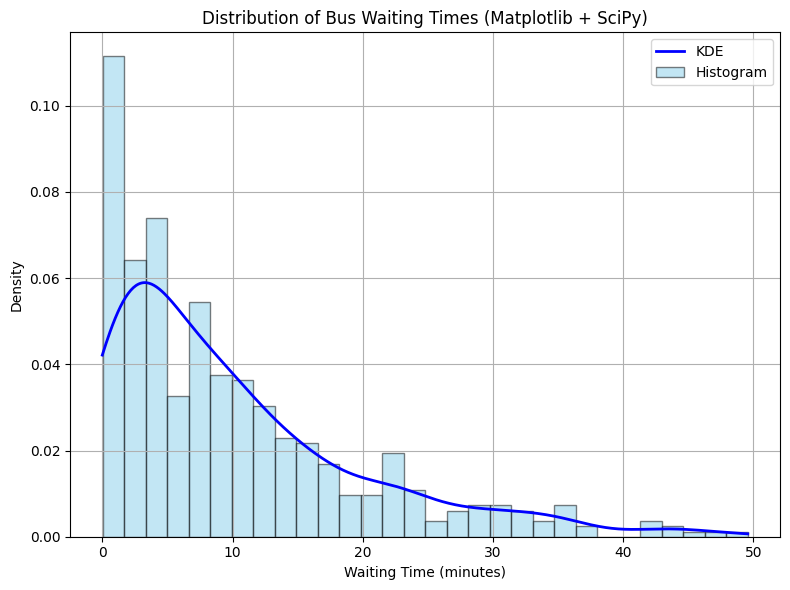

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde  # For KDE calculation

# --- Matplotlib (with SciPy for KDE) ---
plt.figure(figsize=(8, 6))

# Calculate the KDE using SciPy
kde = gaussian_kde(df_waiting['Waiting Time (minutes)'])
x_values = np.linspace(0, df_waiting['Waiting Time (minutes)'].max(), 500)  # Create a range of x values
density = kde(x_values)  # Calculate the density at each x value

# Plot the KDE
plt.plot(x_values, density, color='blue', linewidth=2, label='KDE')

# Add a histogram for comparison (optional)
plt.hist(df_waiting['Waiting Time (minutes)'], bins=30, density=True, alpha=0.5, color='skyblue', edgecolor='black', label='Histogram')

plt.title('Distribution of Bus Waiting Times (Matplotlib + SciPy)')
plt.xlabel('Waiting Time (minutes)')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#### Density Plots with Seaborn:

/var/folders/tp/8wnc6rdn5t92sctj6slch1pw0000gn/T/ipykernel_72656/778937673.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_waiting, x='Waiting Time (minutes)', shade=True, color='blue', label='KDE') # Changed to kdeplot and added shade


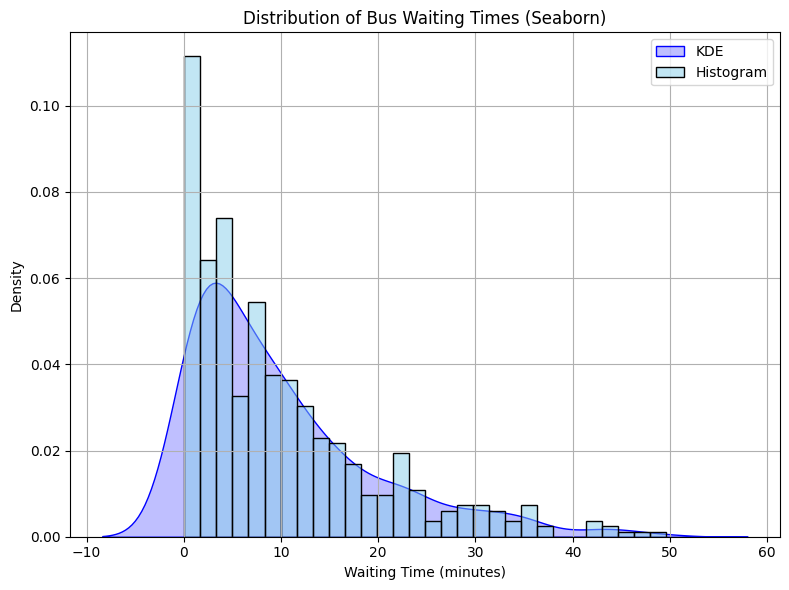

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Seaborn ---
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df_waiting, x='Waiting Time (minutes)', shade=True, color='blue', label='KDE') # Changed to kdeplot and added shade

# Add a histogram for comparison (optional)
sns.histplot(data=df_waiting, x='Waiting Time (minutes)', bins=30, stat='density', alpha=0.5, color='skyblue', label='Histogram', kde= False) # Modified

plt.title('Distribution of Bus Waiting Times (Seaborn)')
plt.xlabel('Waiting Time (minutes)')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()